# Specify population units with meshes

This example shows how to use obj mesh files to specify the population units.

In [1]:
import os
import numpy as np
from snudda import SnuddaInit
from snudda.place.create_cube_mesh import create_cube_mesh

network_path = os.path.join("networks","population_unit_mesh_network")
config_file = os.path.join(network_path, "network-config.json")
si = SnuddaInit(config_file=config_file, random_seed=12345)
si.define_striatum(num_dSPN=1000, num_iSPN=1000, num_FS=0, num_LTS=0, num_ChIN=0,
                   volume_type="cube", neurons_dir="$DATA/neurons")

mesh_file_A = os.path.join(network_path, "mesh", "example-mesh-A.obj")
mesh_file_B = os.path.join(network_path, "mesh", "example-mesh-B.obj")

create_cube_mesh(file_name=mesh_file_A, centre_point=[0.00475, 0.004, 0.00775], side_len=0.0001) 
create_cube_mesh(file_name=mesh_file_B, centre_point=[0.00475, 0.004-0.00015, 0.00775-0.00015], side_len=0.0001) 

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_mesh(structure_name="Striatum", neuron_types=["dSPN"], mesh_file=mesh_file_A, fraction_of_neurons=0.7)
si.add_population_unit_mesh(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], mesh_file=mesh_file_B, fraction_of_neurons=0.8)
 
si.write_json(config_file)

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
FS: Skipping neuron because, num_neurons =0
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
ChIN: Skipping neuron because, num_neurons =0
LTS: Skipping neuron because, num_neurons =0
No directory $DATA/neurons/striatum/ngf, skipping NGF cells.
Writing networks/population_unit_mesh_network/network-config.json


In [2]:
os.environ["IPYTHONDIR"] = os.path.join(os.path.abspath(os.getcwd()), ".ipython")
os.environ["IPYTHON_PROFILE"] = "default"
os.system("ipcluster start -n 4 --profile=$IPYTHON_PROFILE --ip=127.0.0.1 --log-level ERROR 2> parallel-log.txt &")

import time
time.sleep(10) # Wait for ipcluster to start

In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path, parallel=True, ipython_profile="default")
snd.create_network()

Placing neurons
Network path: networks/population_unit_mesh_network
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=None from networks/population_unit_mesh_network/network-config.json
Generating 9874 points for networks/population_unit_mesh_network/mesh/Striatum-cube-mesh-0.00029179512939439816.obj
n_points = 9392, previous close_pairs = 19707
n_points = 8935, previous close_pairs = 16128
n_points = 8502, previous close_pairs = 13425
n_points = 8092, previous close_pairs = 11224
n_points = 7706, previous close_pairs = 9382
n_points = 7342, previous close_pairs = 7911
n_points = 7002, previous close_pairs = 6580
n_points = 6685, previous close_pairs = 5565
n_points = 6391, previous close_pairs = 4666
n_points = 6121, previous close_pairs = 3866
n_points = 5874, previous close_pairs = 3310
n_points = 5650, previous close_pairs = 2832
n_points = 5448, previous close_pairs = 

In [4]:
os.system("ipcluster stop")

2024-04-29 15:10:12.158 [IPClusterStop] Stopping cluster 
2024-04-29 15:10:12.158 [IPClusterStop] Stopping controller
2024-04-29 15:10:12.290 [IPClusterStop] Stopping engine(s): 1714396001


0

Reading SNUDDA_DATA=None from networks/population_unit_mesh_network/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/population_unit_mesh_network/network-synapses.hdf5
Population unit 0 has 1959 neurons
Population unit 1 has 26 neurons
Population unit 2 has 15 neurons


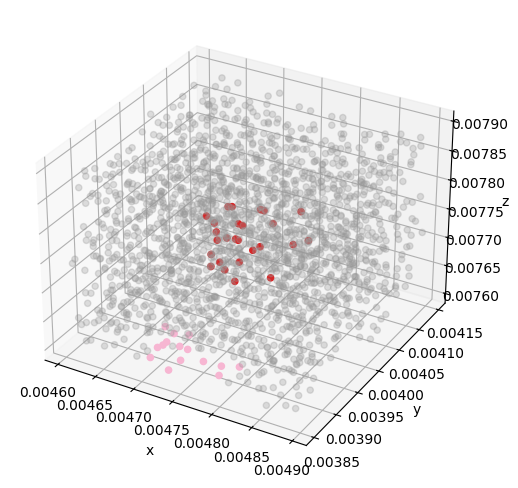

In [5]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations()

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)